<a href="https://colab.research.google.com/github/HariTarz/Mobile_Price_Range_Prediction/blob/main/PS_Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

## <b> Data Description </b>

### Data fields
* #### Battery_power - Total energy a battery can store in one time measured in mAh.
* #### Blue - Has bluetooth or not.
* #### Clock_speed - speed at which microprocessor executes instructions.
* #### Dual_sim - Has dual sim support or not.
* #### Fc - Front Camera mega pixels.
* #### Four_g - Has 4G or not.
* #### Int_memory - Internal Memory in Gigabytes.
* #### M_dep - Mobile Depth in cm.
* #### Mobile_wt - Weight of mobile phone.
* #### N_cores - Number of cores of processor.
* #### Pc - Primary Camera mega pixels.
* #### Px_height - Pixel Resolution Height.
* #### Px_width - Pixel Resolution Width.
* #### Ram - Random Access Memory in Mega Bytes.
* #### Sc_h - Screen Height of mobile in cm.
* #### Sc_w - Screen Width of mobile in cm.
* #### Talk_time - longest time that a single battery charge will last when you are.
* #### Three_g - Has 3G or not.
* #### Touch_screen - Has touch screen or not.
* #### Wifi - Has wifi or not.
* #### Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).



## Import libraries

In [319]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Mounting the drive and reading the dataset

In [320]:
from google.colab import drive
drive.mount('/content/drive')

In [321]:
# Creating a the dataset file that and reading the dataset
path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Supervised ML - Classification Capstone Project/PS - Mobile Price Range Prediction/dat/data_mobile_price_range.csv'
data = pd.read_csv(path)

## Exploring the dataset

In [322]:
# Viewing the dataset for first time
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [324]:
# Viewing the size of the dataset
data.shape

(2000, 21)

In [325]:
# Checking for null values in the dataset
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [326]:
# Checking for categoriacal values
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [327]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


From the above description, we can see the minnimum value for columns 'sc_w'(screen width) and 'px_height' is 0, which is not possible in real life. So we need handle these discrepencies in data and will have to replace these values.

## Exploratory Data Analysis

### Categotical Features

Text(0.5, 1.0, 'price_range counts')

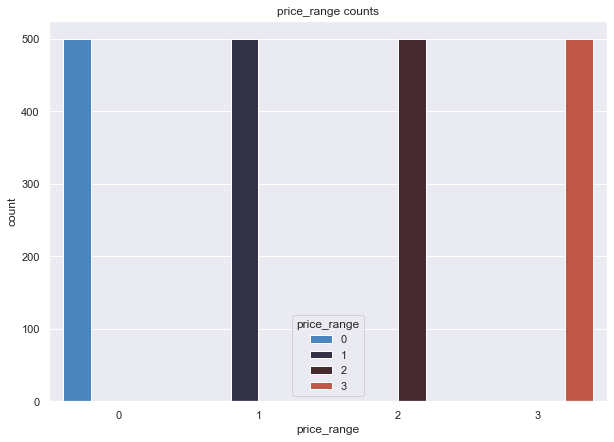

In [328]:
# Plotting the target variable 'price_range'
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='price_range', data=data, hue='price_range', palette= 'icefire')
sns.set_theme(style='whitegrid')
ax.set_xlabel('price_range')
# ax.set_ylabel('Frequency')
ax.set_title('price_range counts')

**Observations:**

* As we see in the above plot of our target variable 'price_range' is having four labels.
    
    * 0 - Low Price
    * 1 - Low Price
    * 2 - Low Price
    * 3 - Low Price
    
* All the four variable are equal in counts, which means there is no imbalance in the target varibale, and all the four lables are equally distributed in the dataset.

In [329]:
categorical_columns= [ 'blue',  'dual_sim',  'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores']

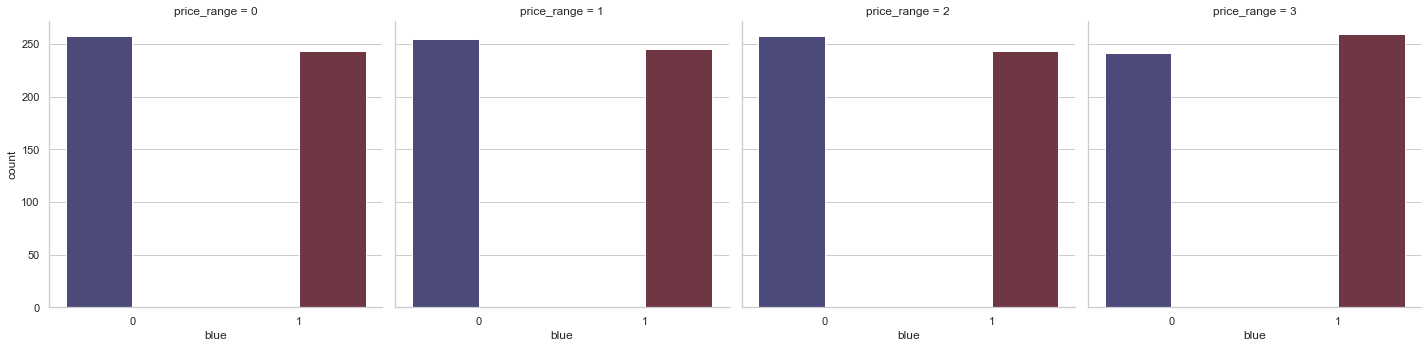

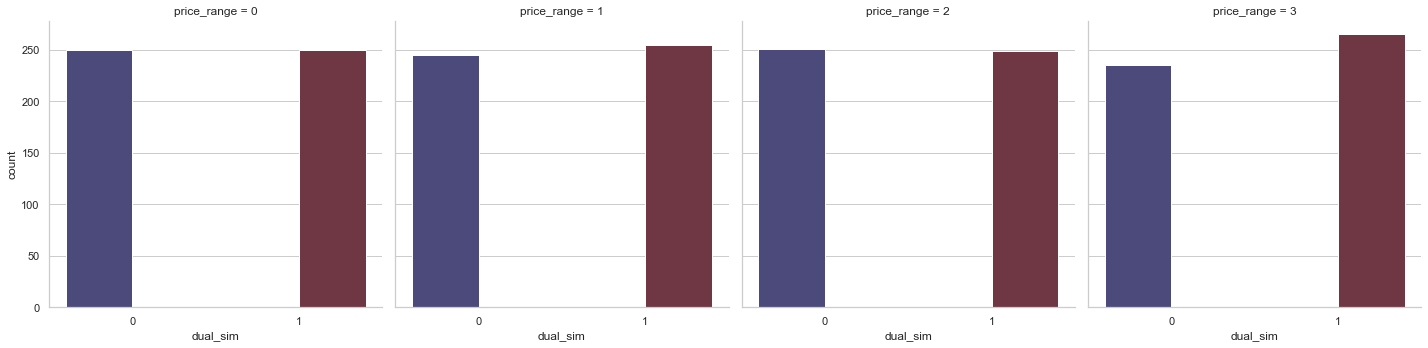

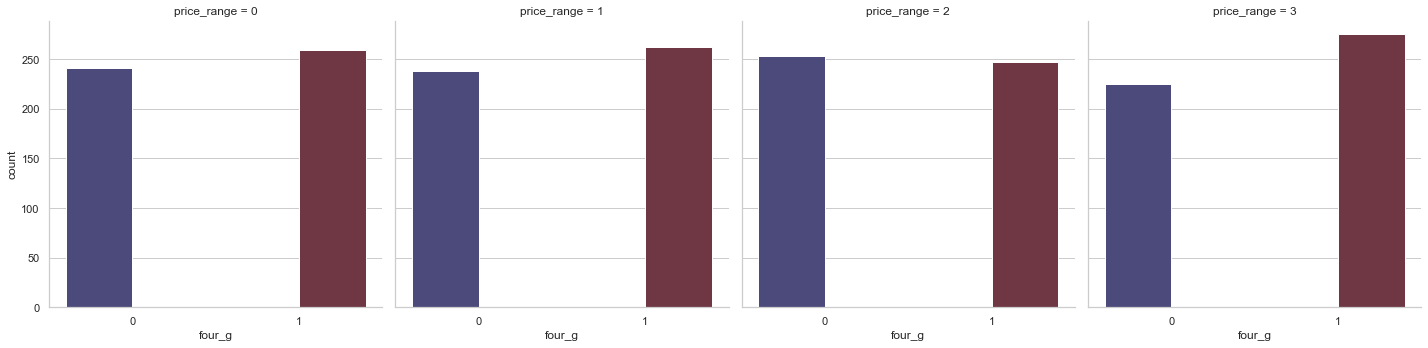

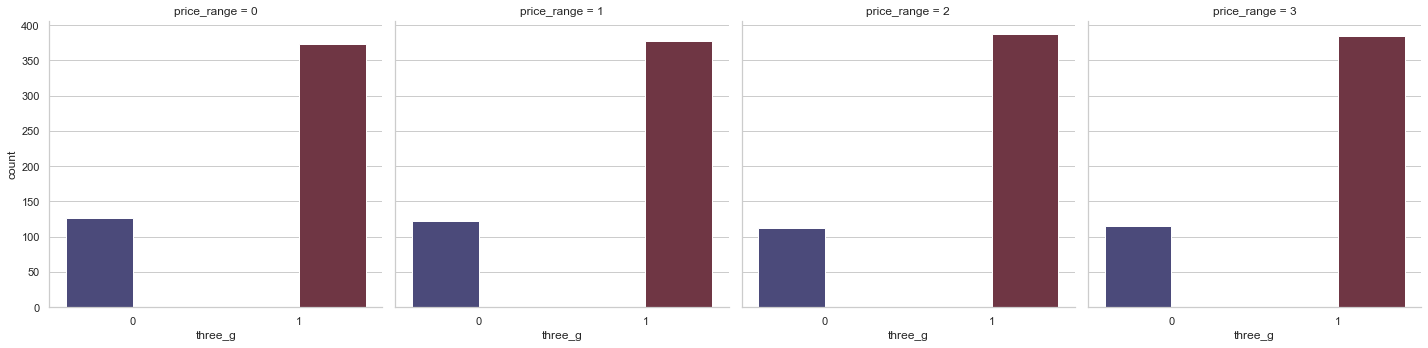

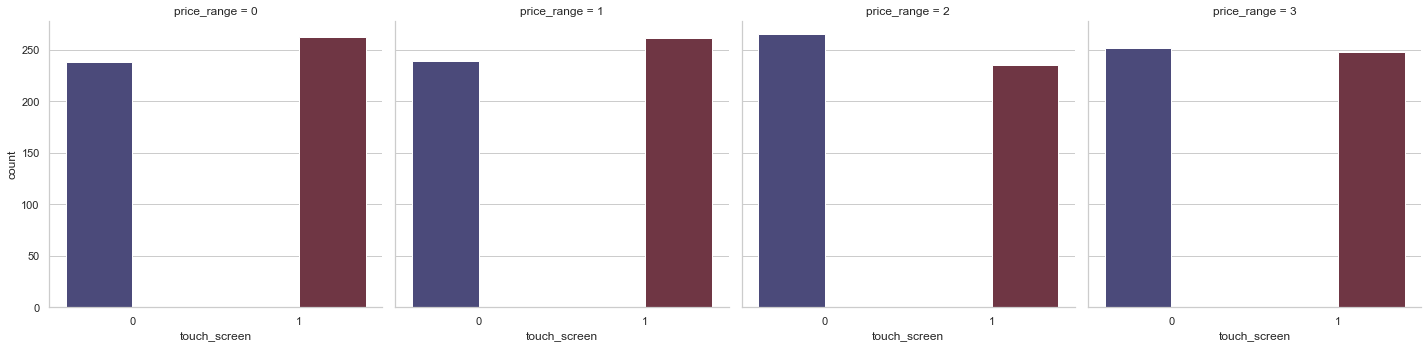

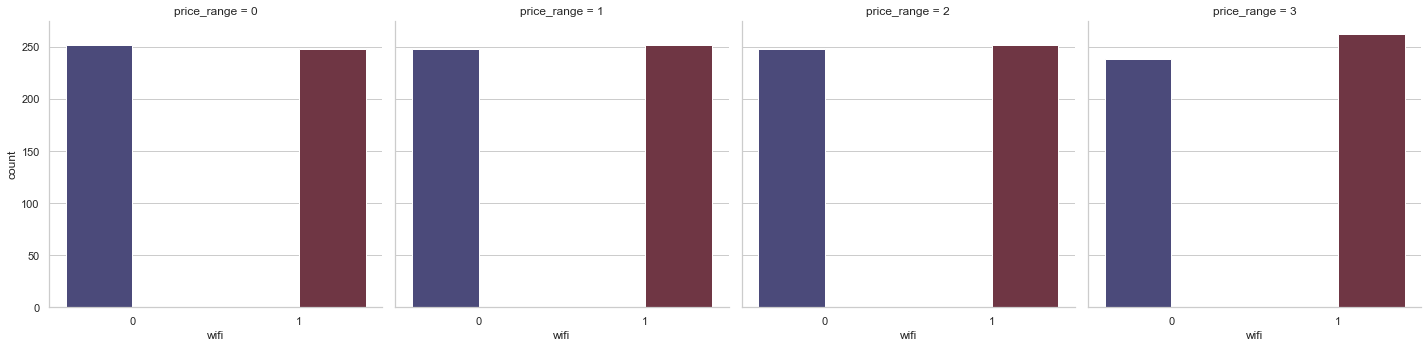

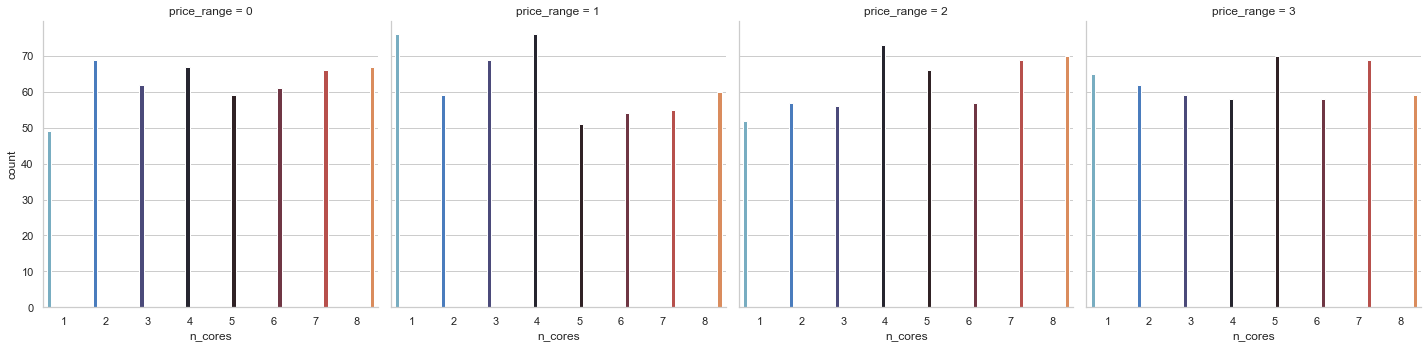

In [330]:
# Plotting the categorical variables
for col in categorical_columns:
  sns.catplot(x=col, hue=col, col="price_range", data=data, kind="count", height=5, aspect=1, palette= 'icefire');
  sns.set_theme(style='whitegrid')

**Observations:**

As we see from the above plots, we have observed the following,
* As we can see in the plot above, except 'three_g' and 'n_cores' feature, almost all of them have equal distribution of both categories, three_g can play an important role in prediction.
* 'four_g' technology is available with almost equal distribution in all four price ranges.
* All four ranges of mobiles are avail with almost equal distribution of dual sim feature.

### Continous Features

Text(0.5, 1.0, 'Battery power VS price range')

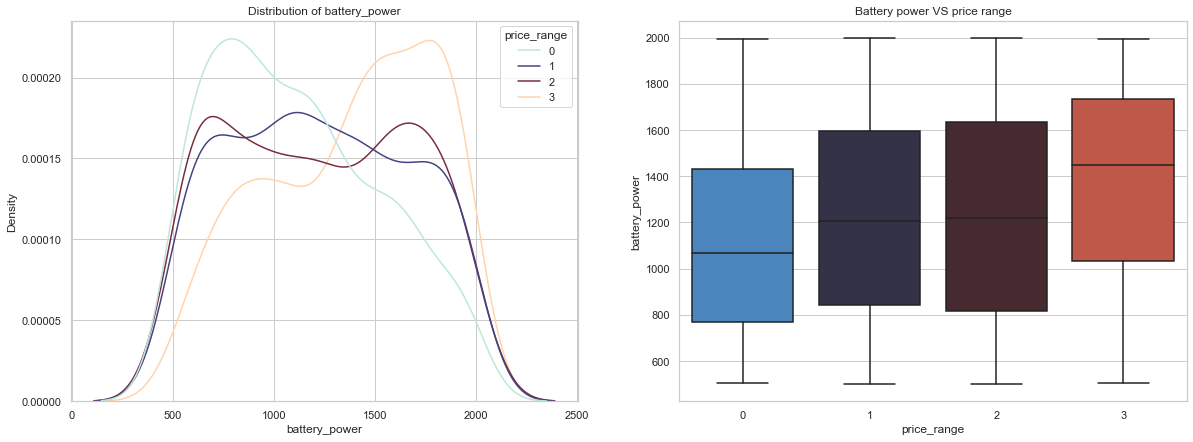

In [331]:
# Plotting the distribution of 'battery_power'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="battery_power", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of battery_power')
sns.boxplot(y="battery_power", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('Battery power VS price range')

**Observations:**

As we see from the above plots, we have observed the following,

* Mobiles in price_range-0 mostly have lower battery power.
* Mobiles in price_range-1 and price_range-2 also showing some variation in distribtion. 
* Mobiles in price_range-3 mostly have higher battery power.

Text(0.5, 1.0, 'clock_speed VS price range')

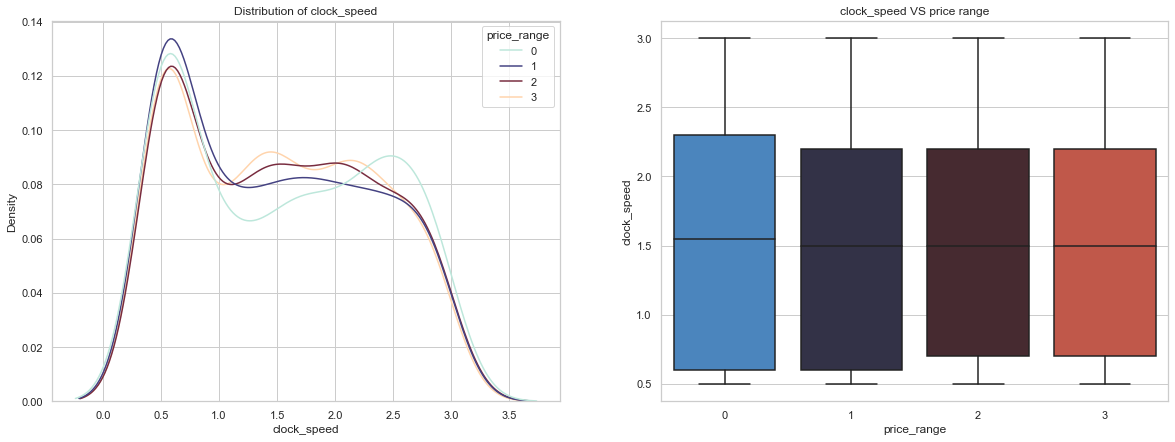

In [332]:
# Plotting the distribution of 'clock_speed'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="clock_speed", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of clock_speed')
sns.boxplot(y="clock_speed", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('clock_speed VS price range')

**Observations:**

As we see from the above plots, we have observed the following,
* The Clock Speed distribution is very similar along all the price ranges except 0 , which is a little different.
* The price_range-0 have few higher clock speed mobile when comparing with other price ranges.

Text(0.5, 1.0, 'Front camera resolution (fc) VS price range')

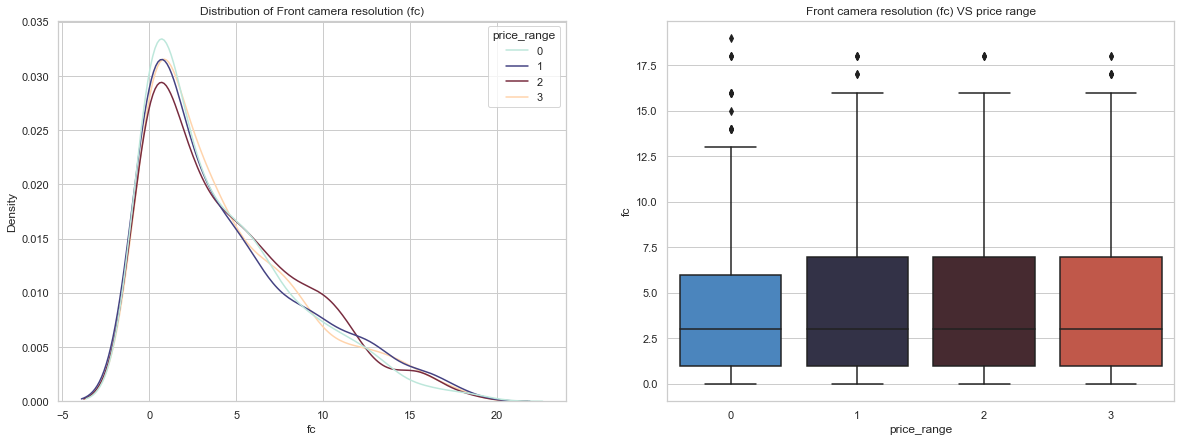

In [333]:
# Plotting the distribution of 'fc'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="fc", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of Front camera resolution (fc)')
sns.boxplot(y="fc", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('Front camera resolution (fc) VS price range')

Text(0.5, 1.0, 'Primary camera resolution (fc) VS price range')

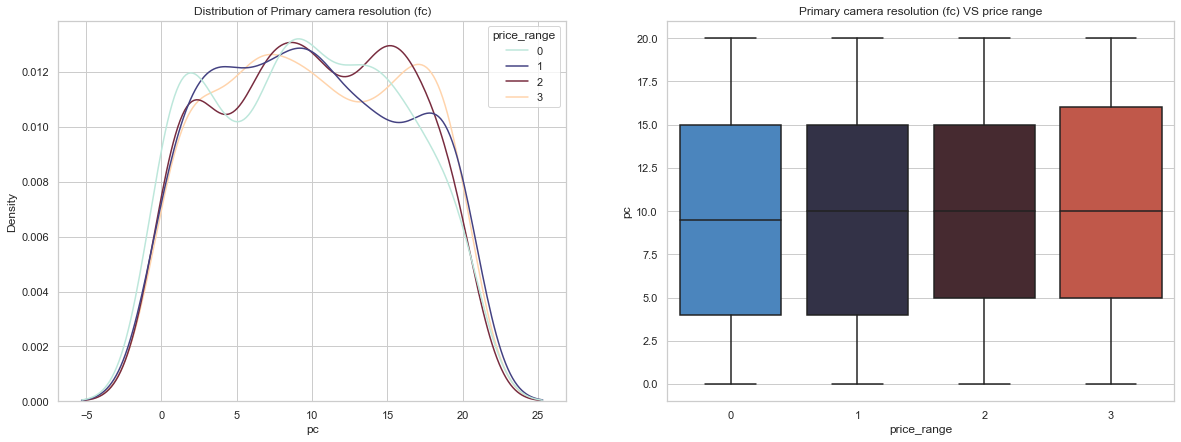

In [334]:
# Plotting the distribution of 'pc'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="pc", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of Primary camera resolution (fc)')
sns.boxplot(y="pc", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('Primary camera resolution (fc) VS price range')

Text(0.5, 0, 'Front Camera(Red) - Rear Camera(Blue')

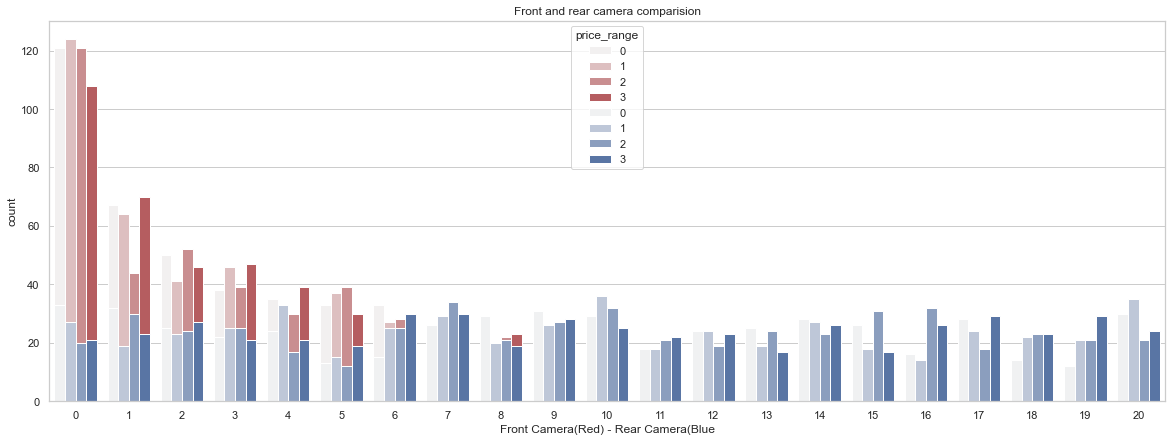

In [335]:
# Plotting between 'fc' VS 'pc'
fig, ax = plt.subplots(figsize=(20,7))
sns.countplot(x='fc', data=data, hue='price_range' ,color= 'r', ax=ax)
sns.countplot(x='pc', data=data, hue='price_range', color= 'b', ax=ax)
ax.set_title('Front and rear camera comparision')
ax.set_xlabel('Front Camera(Red) - Rear Camera(Blue')

**Observations:**

As we see from the above plots, we have observed the following,
* 'fc' front camera resolution, distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.
* Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.

Text(0.5, 1.0, 'internalmemory VS price range')

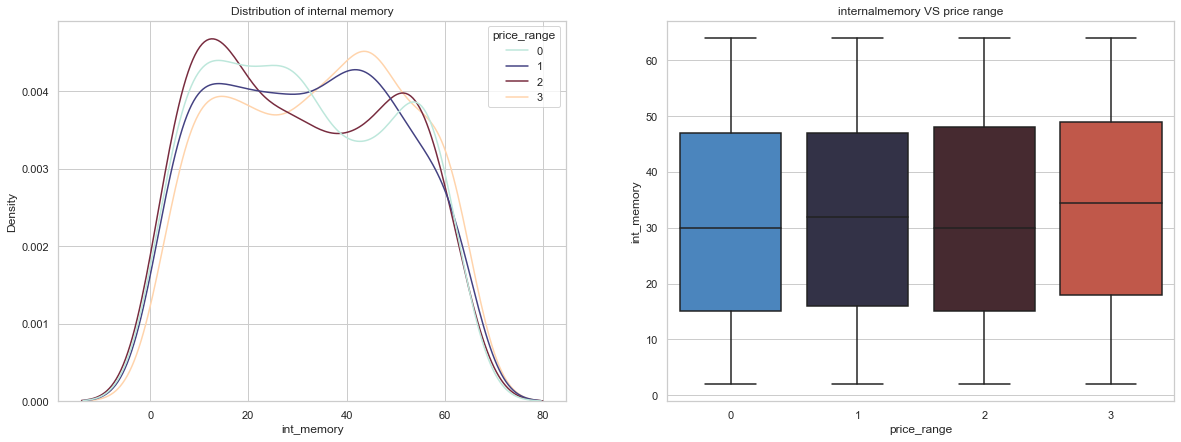

In [336]:
# Plotting the distribution of 'int_memory'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="int_memory", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of internal memory')
sns.boxplot(y="int_memory", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('internalmemory VS price range')

**Observations:**

As we see from the above plots, we have observed the following,
* There is a little variation in the Internal Memory along the Price range. Mobiles with higher price seems to have higher internal memory.
* This feature could be helpful in predicting the Price range.

Text(0.5, 1.0, 'mobile depth VS price range')

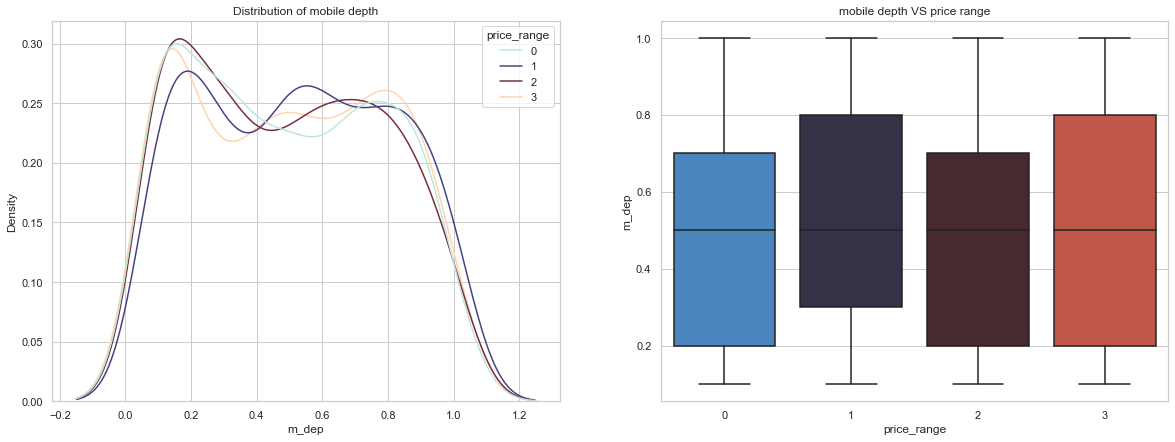

In [337]:
# Plotting the distribution of 'm_dep'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="m_dep", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of mobile depth')
sns.boxplot(y="m_dep", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('mobile depth VS price range')

Text(0.5, 1.0, 'mobile width VS price range')

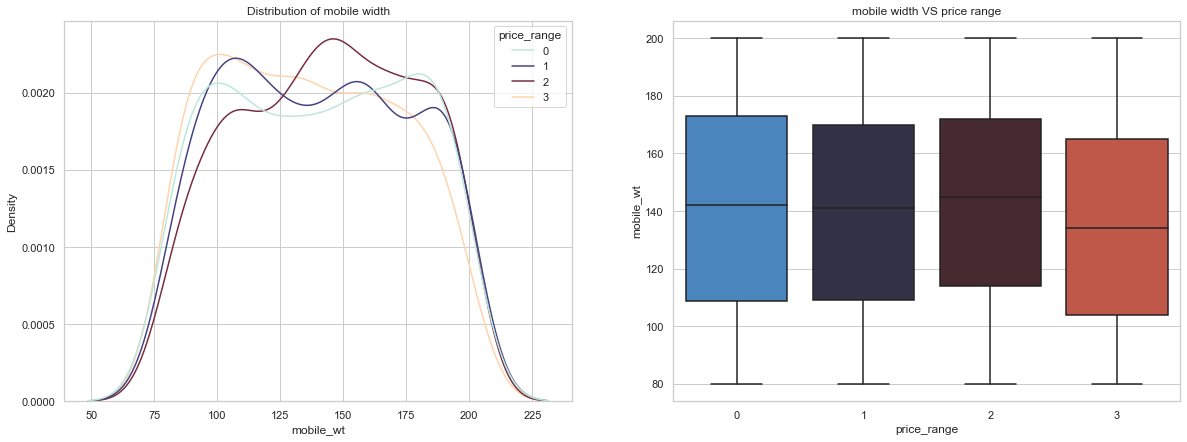

In [338]:
# Plotting the distribution of 'mobile_wt'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="mobile_wt", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of mobile width')
sns.boxplot(y="mobile_wt", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('mobile width VS price range')

**Observations:**

As we see from the above plots, we have observed the following,
* Mobile weight is reduced a little bit in the Price category-3 which means costly phones are ligher.
* A little variation is observed here in all price_ranges.

Text(0.5, 1.0, 'pixels height VS price range')

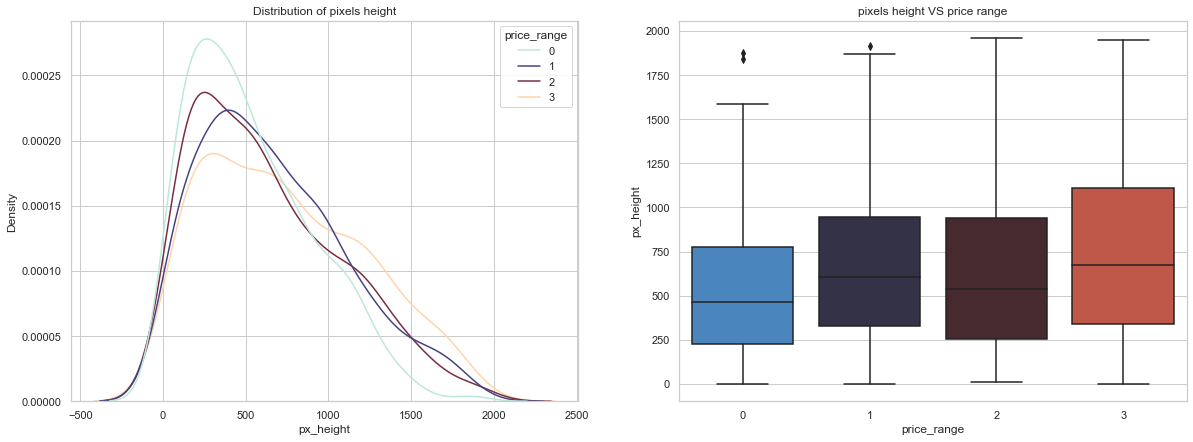

In [339]:
# Plotting the distribution of 'px_height'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="px_height", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of pixels height')
sns.boxplot(y="px_height", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('pixels height VS price range')

Text(0.5, 1.0, 'pixels width VS price range')

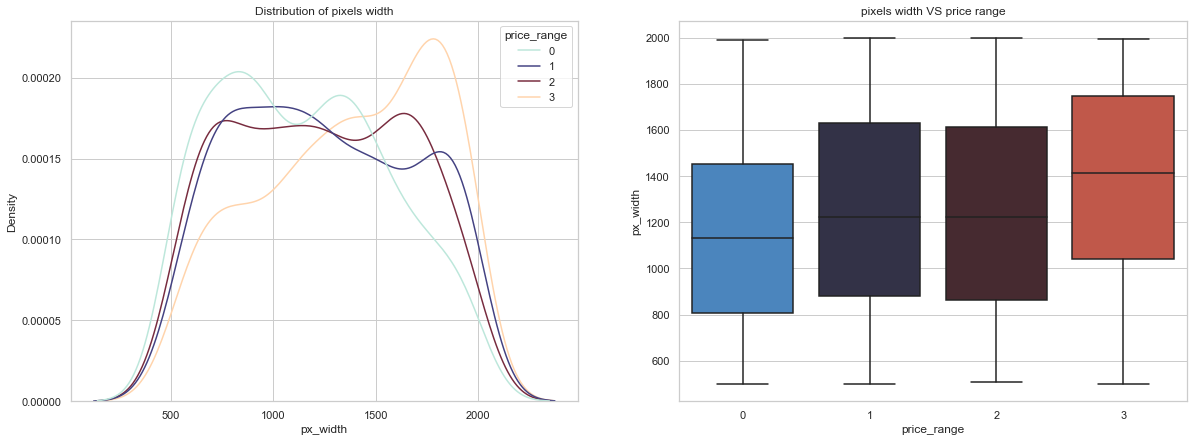

In [340]:
# Plotting the distribution of 'px_width'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="px_width", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of pixels width')
sns.boxplot(y="px_width", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('pixels width VS price range')

**Observations:**

As we see from the above plots, we have observed the following,
* A little variation is there in px_height.
* Some variation is visible here in px_width as well, so we can say that it would be a driving factor in deciding price_range.

Text(0.5, 1.0, 'ram size(in GB) VS price range')

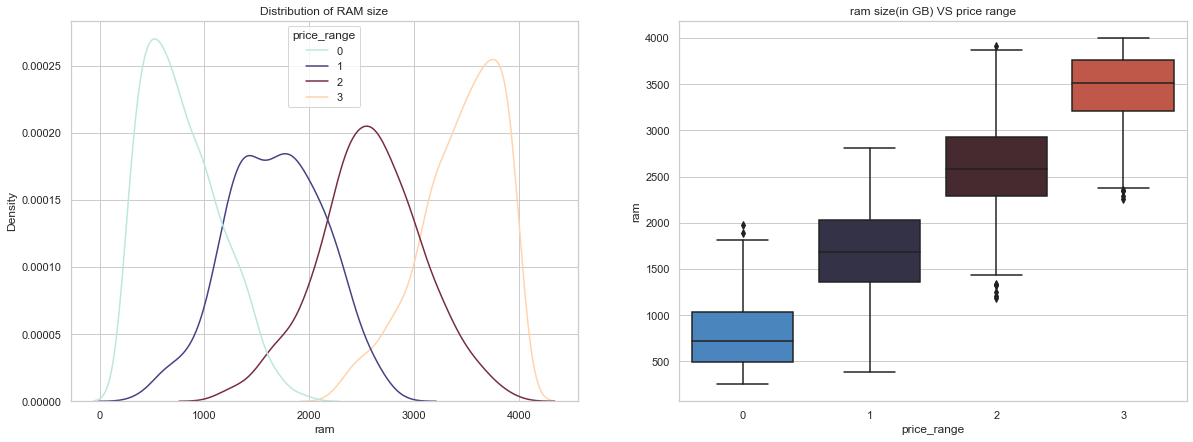

In [341]:
# Plotting the distribution of 'ram'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="ram", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of RAM size')
sns.boxplot(y="ram", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('ram size(in GB) VS price range')

**Observations:**

As we see from the above plots, we have observed the following,
* RAM is showing a great variation in the distribution along the target variable. Which is a good sign for making predictions. RAM is gonna be a driving factor for predicting price_range.

Text(0.5, 1.0, 'screen height(in CM) VS price range')

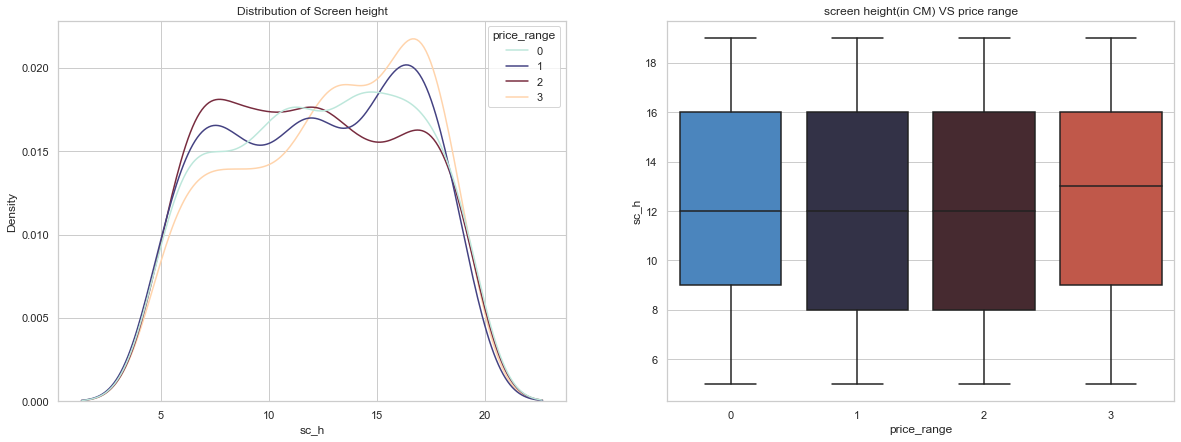

In [342]:
# Plotting the distribution of 'sc_h'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="sc_h", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of Screen height')
sns.boxplot(y="sc_h", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('screen height(in CM) VS price range')

Text(0.5, 1.0, 'screen width(in CM) VS price range')

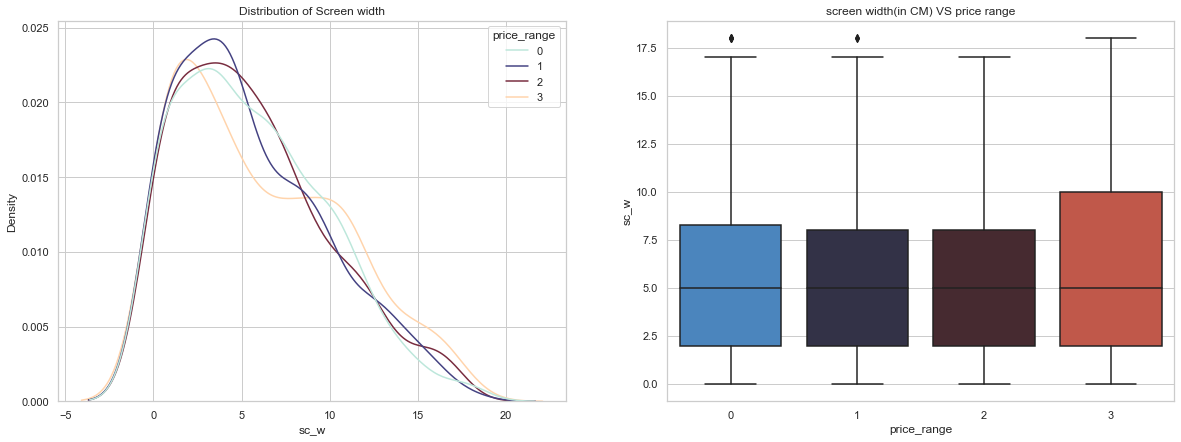

In [343]:
# Plotting the distribution of 'sc_w'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="sc_w", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of Screen width')
sns.boxplot(y="sc_w", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('screen width(in CM) VS price range')

**Observations:**

As we see from the above plots, we have observed the following,
* The minimimum screen width and maximum screen height is same for all four categories of mobiles.
* Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.

Text(0.5, 1.0, 'talk_time(in hours) VS price range')

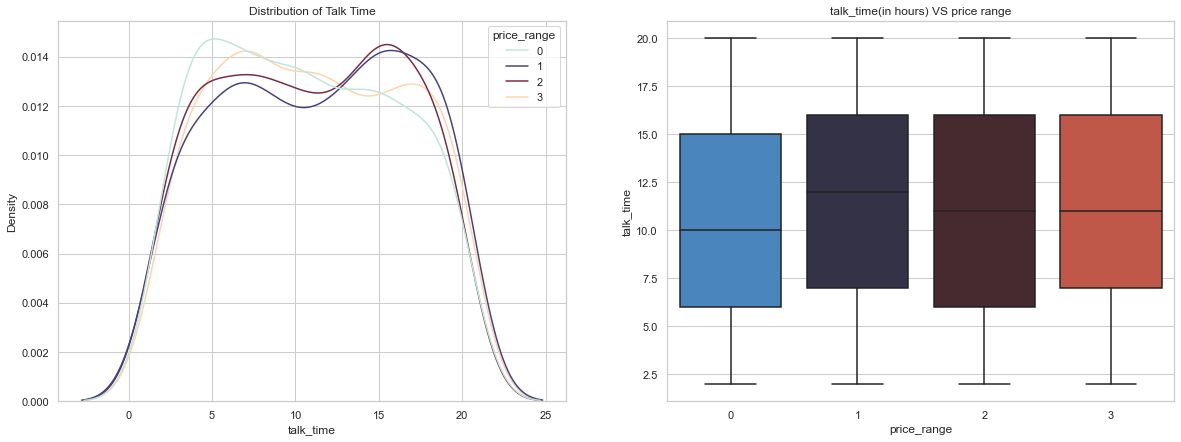

In [344]:
# Plotting the distribution of 'talk_time'
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="talk_time", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of Talk Time')
sns.boxplot(y="talk_time", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('talk_time(in hours) VS price range')

**Observations:**

As we see from the above plots, we have observed the following,
* price_range-2 has little broad distribution of talk-time.
* the max and min values are same for all the four categories.

## Feature Engineering

In [345]:
# Coping the dataset to a new variable
df = data.copy()

In [346]:
# Checking for zero values in 'sc-w'
df[df.sc_w== 0].shape[0]

180

Text(0.5, 1.0, 'Non-zero Screen_Width and  Screen_height')

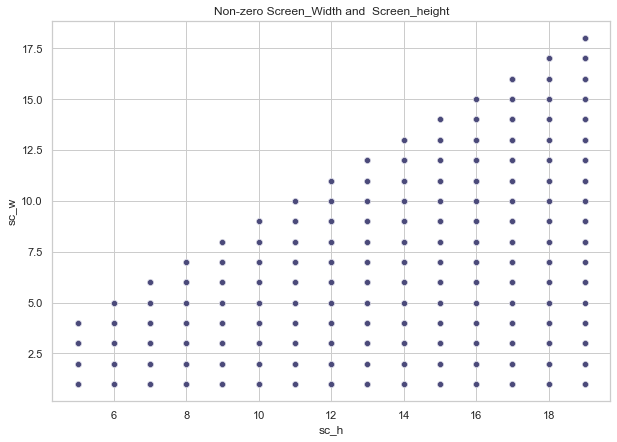

In [347]:
# Plotting between Non-zero Screen_Width and Screen_height
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x= 'sc_h', y= 'sc_w', data= df[df.sc_w!= 0], color='#4b4a7a')
sns.set_theme(style='whitegrid')
# ax.set_xlabel('fc')
# ax.set_ylabel('Frequency')
ax.set_title('Non-zero Screen_Width and  Screen_height')

In [348]:
# Finding the mean for sc_w for corresponding sc_h
sc_w_mean = df[df['sc_w']!=0].groupby('sc_h')['sc_w'].mean()
sc_w_mean_dict = dict(sc_w_mean)
# Creating dict of sc_h as keys and mean sc_w as values 
sc_w_mean_dict = {key : round(sc_w_mean_dict[key]) for key in sc_w_mean_dict}
sc_w_mean_dict

{5: 2,
 6: 3,
 7: 4,
 8: 4,
 9: 4,
 10: 5,
 11: 6,
 12: 7,
 13: 7,
 14: 7,
 15: 7,
 16: 8,
 17: 9,
 18: 9,
 19: 10}

In [349]:
def update_zero_width(w,h):
  '''This function taskes the screen width and screen height as 
  inputs and replace the mean width for zero width values'''
  if w == 0:
    return sc_w_mean_dict[h]
  else:
    return w

In [350]:
# Replacing the zero value widths
df['sc_w']= df.apply(lambda x: update_zero_width(x.sc_w, x.sc_h), axis=1)

In [351]:
# Checking for zero values in 'sc-w'
df[df['sc_w']==0].shape[0]

0

In [352]:
# Find the diagonalscreensize
# Since the shape of the screen is square/rectangle, we can use Pythagoras theorm (W**2 + H**2)**0.5
df['screen_size'] = ((df.sc_w**2)+(df.sc_h**2))**0.5
df.drop(['sc_w', 'sc_h'], axis= 1, inplace = True)

In [353]:
# Checking for zero values in 'px_height'
df[df['px_height']== 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,screen_size
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,16,1,1,0,3,14.764823
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,1,1,0,1,8.602325


Text(0.5, 1.0, 'Non-zero Pixel_Width and  Pixel_height')

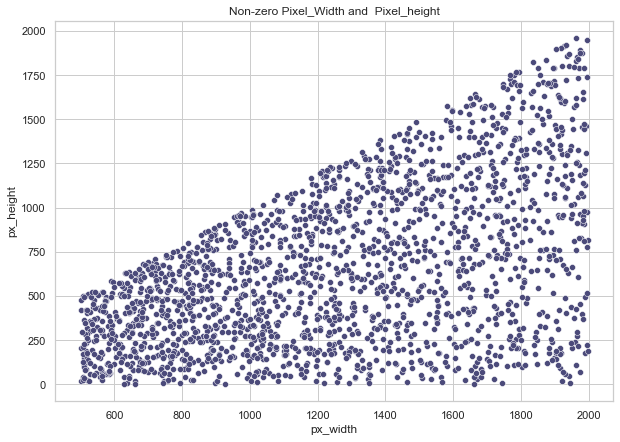

In [354]:
# Plotting between Non-zero pixel_Width and  Pixel_height
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.scatterplot(x= 'px_width', y= 'px_height', data= df[df.px_height!= 0], color='#4b4a7a')
sns.set_theme(style='whitegrid')
# ax.set_xlabel('fc')
# ax.set_ylabel('Frequency')
ax.set_title('Non-zero Pixel_Width and  Pixel_height')

In [355]:
# Checking for unique values in 'px_width'
len(df.px_width.value_counts())

1109

In [356]:
# Finding the mean for px_height for corresponding px_width
px_height_mean = df[df['px_height']!=0].groupby('px_width')['px_height'].mean()
px_height_mean_dict = dict(px_height_mean)
# Creating dict of px_width as keys and mean px_height as values 
px_height_mean_dict = {key : round(px_height_mean_dict[key]) for key in px_height_mean_dict}
px_height_mean_dict

{500: 448,
 501: 112,
 503: 295,
 506: 501,
 507: 138,
 508: 26,
 509: 360,
 510: 99,
 511: 230,
 512: 184,
 513: 232,
 515: 418,
 516: 124,
 517: 210,
 518: 174,
 519: 296,
 520: 368,
 521: 134,
 522: 390,
 525: 15,
 527: 238,
 528: 407,
 529: 119,
 530: 422,
 533: 357,
 534: 338,
 536: 436,
 537: 455,
 538: 306,
 539: 259,
 540: 168,
 541: 238,
 542: 477,
 544: 216,
 545: 260,
 547: 322,
 548: 509,
 549: 377,
 550: 292,
 551: 503,
 556: 419,
 557: 64,
 558: 228,
 559: 114,
 562: 34,
 563: 402,
 564: 238,
 565: 468,
 566: 63,
 568: 447,
 569: 440,
 570: 275,
 571: 472,
 572: 410,
 574: 484,
 575: 59,
 577: 113,
 580: 222,
 581: 62,
 582: 201,
 583: 171,
 584: 173,
 585: 235,
 588: 175,
 589: 361,
 590: 418,
 591: 308,
 592: 518,
 593: 287,
 594: 334,
 596: 579,
 598: 116,
 599: 401,
 603: 296,
 605: 271,
 607: 368,
 610: 227,
 613: 272,
 614: 466,
 615: 79,
 616: 370,
 618: 536,
 619: 162,
 620: 166,
 621: 532,
 622: 140,
 623: 245,
 627: 333,
 629: 274,
 630: 159,
 631: 400,
 632: 62

In [357]:
# Replacing the zero value pixel heights
df['px_height']= df.apply(lambda x: (px_height_mean_dict[x.px_width] if x.px_height == 0 else x.px_height), axis=1)

In [358]:
# Checking for zero values in 'px_height'
df[df['px_height']==0].shape[0]

0

In [359]:
# Calculating the resultion by cobining the columns 'px_height' and 'px_width'
df['pixels_resolution'] = df['px_height']*df['px_width']
# Dropping the columns 'px_height' and 'px_width'
df.drop(['px_height', 'px_width'], axis= 1, inplace = True)

## Handling Categorical Features

In [360]:
# Viewing the available columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'three_g', 'touch_screen', 'wifi', 'price_range', 'screen_size',
       'pixels_resolution'],
      dtype='object')

In [361]:
# Seperating the available columns
cat_col= [ 'blue',  'dual_sim',  'four_g', 'three_g', 'n_cores', 'touch_screen', 'wifi']
continous_col = ['battery_power', 'clock_speed','fc', 'pc' ,'int_memory','m_dep', 'mobile_wt', 'ram', 'talk_time','screen_size', 'pixels_resolution']
target_col= ['price_range']

In [362]:
# checking for the mobile which supports 4G but not supports 3G
df[(df.three_g == 0) & (df.four_g == 1)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range,screen_size,pixels_resolution


In [363]:
# Combining the supporting network column to create a new column called 'network_support'
df['network_support'] = df['four_g'] + df['three_g']
df.drop(['four_g', 'three_g'], axis= 1, inplace= True)

Since we don't have any such mobile records in our dataset we combinined the both the columns to form a new valid column named 'network_support'.




* 2 - Supports both 3G and 4G
* 1 - Supports only 3G
* 0 - Not Supports the both 3G and 4G

<AxesSubplot:ylabel='network_support'>

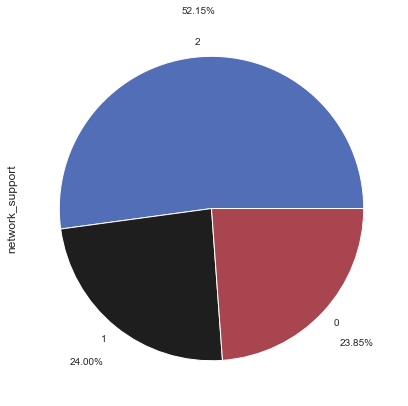

In [364]:
# Value counts of different supporting network types
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
colors= ['#526eb6', '#1f1e1e', '#a8454e']
df.network_support.value_counts().plot(kind='pie', fontsize=10, autopct='%1.2f%%',pctdistance=1.3, labeldistance=1.1, colors=colors)

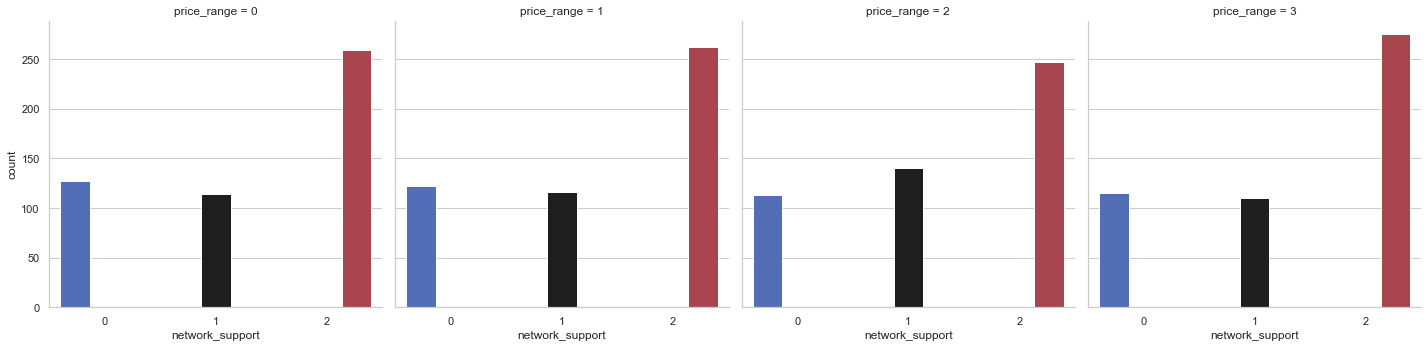

In [365]:
# Value counts of different supporting network types
sns.catplot(data=df, x="network_support", col="price_range", hue="network_support", kind="count", palette= 'icefire')

In [366]:
(df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'touch_screen', 'wifi', 'price_range', 'screen_size',
       'pixels_resolution', 'network_support'],
      dtype='object')

In [367]:
# Seperating the available columns based on the use case
continous_col = ['battery_power', 'clock_speed','fc', 'pc' ,'int_memory','m_dep', 'mobile_wt', 'ram', 'talk_time','screen_size', 'pixels_resolution']
cat_col= [ 'blue',  'dual_sim', 'n_cores', 'touch_screen', 'wifi', 'network_support']
target_col= ['price_range']
continous_col + cat_col + target_col

['battery_power',
 'clock_speed',
 'fc',
 'pc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'ram',
 'talk_time',
 'screen_size',
 'pixels_resolution',
 'blue',
 'dual_sim',
 'n_cores',
 'touch_screen',
 'wifi',
 'network_support',
 'price_range']

## Correlation analysis

Text(0.5, 1.0, 'Mobile price range prediction dataset correlation')

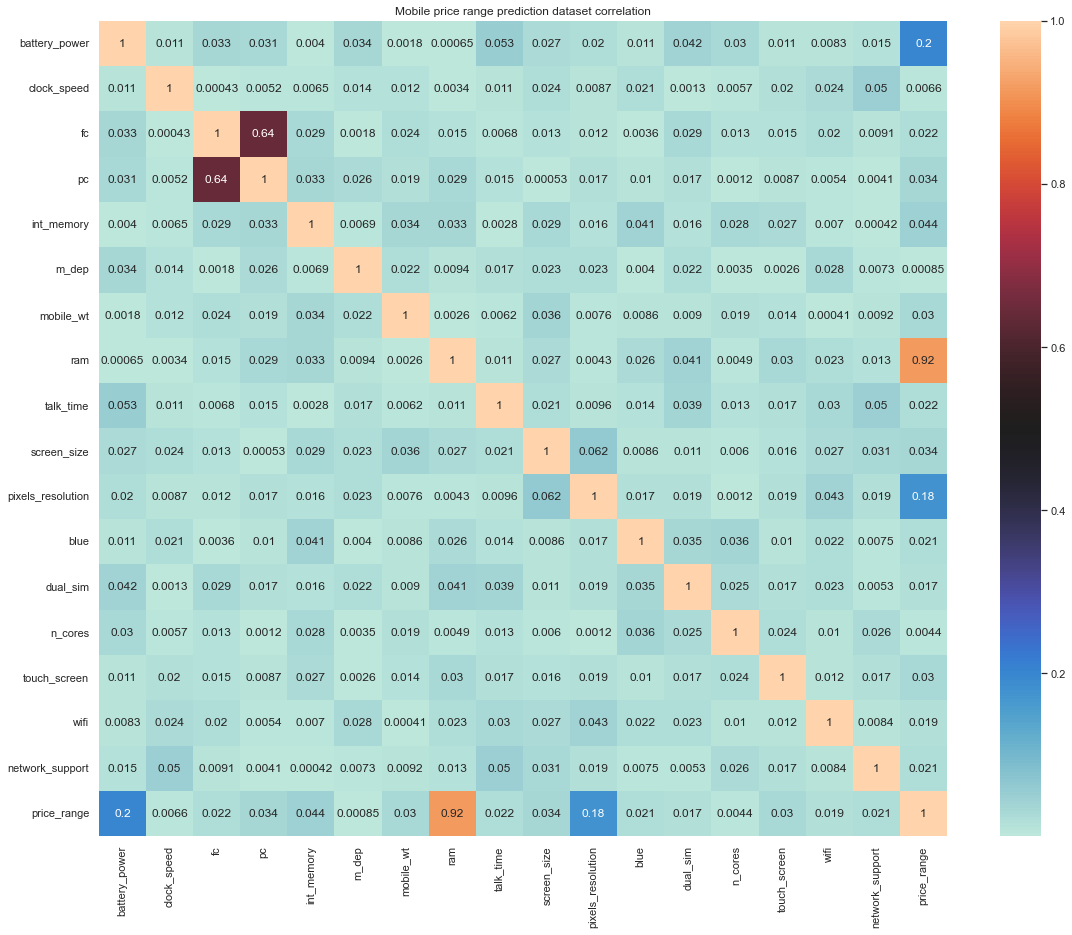

In [368]:
# Calculating the correlation amoung the columns for the given dataset
df_corr = df[continous_col + cat_col + target_col].corr()

# Plotting the correlation
fig = plt.figure(figsize=(19,15))
ax = fig.gca()
sns.heatmap(abs(df_corr), annot=True, cmap='icefire')
plt.title('Mobile price range prediction dataset correlation')

## Splitting the data for training models

In [369]:
# Importing the required sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, plot_roc_curve, plot_precision_recall_curve, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from termcolor import colored

In [370]:
# Creating dict list for each evalution metrics of the ML algorithms
before_tuning_train_metrics= {'Accuracy':[], 'Precision':[], 'Recall':[], 'f1_score':[], 'AUC_ROC':[]}
before_tuning_test_metrics= {'Accuracy':[], 'Precision':[], 'Recall':[], 'f1_score':[], 'AUC_ROC':[]}
after_tuning_train_metrics= {'Accuracy':[], 'Precision':[], 'Recall':[], 'f1_score':[], 'AUC_ROC':[]}
after_tuning_test_metrics= {'Accuracy':[], 'Precision':[], 'Recall':[], 'f1_score':[], 'AUC_ROC':[]}

# This list will contain all the metrics as list of dictionaries
all_metrics =[before_tuning_train_metrics, before_tuning_test_metrics, after_tuning_train_metrics, after_tuning_test_metrics]

# Function for calculating and storing the evaluation metrics
def calculate_metrics(base_model, optimal_model, X_train, X_test, y_train, y_test):
  '''This function will take simple model, optimal model, and train test values as input, and 
  will calculate the evaluation metrics, and will store them it their corresponding dictionaries.''' 
  train_metrics_list = []
  test_metrics_list = []
  train_test_metrics_list = [train_metrics_list, test_metrics_list]

  for model in [base_model, optimal_model]:
    for X, y, n in [(X_train, y_train, 0), (X_test, y_test, 1)]:
      y_pred= model.predict(X)
      train_test_metrics_list[n].append(round(model.score(X,y)*100,2))
      train_test_metrics_list[n].append(round(precision_score(y,y_pred,average='micro'),4))
      train_test_metrics_list[n].append(round(recall_score(y,y_pred,average='micro'),4))
      train_test_metrics_list[n].append(round(f1_score(y,y_pred,average='micro'),4))
      train_test_metrics_list[n].append(round(roc_auc_score(y,model.predict_proba(X), multi_class='ovr',average='weighted'),4))
  for m in range(len(train_test_metrics_list)):
    all_metrics[m]['Accuracy'].append(train_test_metrics_list[m][0])
    all_metrics[m+2]['Accuracy'].append(train_test_metrics_list[m][5])
    all_metrics[m]['Precision'].append(train_test_metrics_list[m][1])
    all_metrics[m+2]['Precision'].append(train_test_metrics_list[m][6])
    all_metrics[m]['Recall'].append(train_test_metrics_list[m][2])
    all_metrics[m+2]['Recall'].append(train_test_metrics_list[m][7])
    all_metrics[m]['f1_score'].append(train_test_metrics_list[m][3])
    all_metrics[m+2]['f1_score'].append(train_test_metrics_list[m][8])
    all_metrics[m]['AUC_ROC'].append(train_test_metrics_list[m][4])
    all_metrics[m+2]['AUC_ROC'].append(train_test_metrics_list[m][9])
 

In [371]:
# Function to print the evalution metrics
def print_metrics(model_n):
  '''This funtion will take model number as input and will print the evaluation metrics'''
  model= ['Random Forest', 'Gradient Boosting', 'XGBoost', 'KNN']
  colors= ['red', 'green', 'yellow', 'blue']
  print(colored(model[model_n]+' model', colors[model_n], attrs=['bold']))
  print('\033[1m' + 'For training data:' + '\033[0m')
  print('\t Model Score: \t', after_tuning_train_metrics['Accuracy'][model_n],'%')
  print('\t Precision: \t', after_tuning_train_metrics['Precision'][model_n])
  print('\t Recall: \t', after_tuning_train_metrics['Recall'][model_n])
  print('\t f1 Score: \t', after_tuning_train_metrics['f1_score'][model_n])
  print('\t AUC_ROC: \t', after_tuning_train_metrics['AUC_ROC'][model_n])
  print('\033[1m' + 'For testing data:' + '\033[0m')
  print('\t Model Score: \t', after_tuning_test_metrics['Accuracy'][model_n],'%')
  print('\t Precision: \t', after_tuning_test_metrics['Precision'][model_n])
  print('\t Recall: \t', after_tuning_test_metrics['Recall'][model_n])
  print('\t f1 Score: \t', after_tuning_test_metrics['f1_score'][model_n])
  print('\t AUC_ROC: \t', after_tuning_test_metrics['AUC_ROC'][model_n])

In [372]:
# Seperating dependent and independent variables of the dataset
X=df[continous_col + cat_col].copy()
y=df[target_col].copy().values.ravel()
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {len(y)}")

Shape of X: (2000, 17)
Shape of y: 2000


In [373]:
# Splitting the dataset for Training and Testing models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state= 6)

print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

print("Distribution of classes of dependent variable in train :")
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

print("\n Distribution of classes of dependent variable in test :")
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

The shape of train dataset :
(1200, 17)

 The shape of test dataset :
(800, 17)
Distribution of classes of dependent variable in train :
[[  0 318]
 [  1 290]
 [  2 298]
 [  3 294]]

 Distribution of classes of dependent variable in test :
[[  0 182]
 [  1 210]
 [  2 202]
 [  3 206]]


## Random Forest Classification

In [374]:
# Importing the RandomForest packages
from sklearn.ensemble import RandomForestClassifier

In [375]:
# Training the simple Random Forest model
rf_clf = RandomForestClassifier(random_state=6)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=6)

In [376]:
# Model score for training and testing data
print(rf_clf.score(X_train, y_train))
print(rf_clf.score(X_test, y_test))

1.0
0.84375


Since we have some errors in the prediction for test data, we can say like this model is not so much overfitting

In [377]:
# Predicting the values for tarining data
y_train_pred_rf_clf = rf_clf.predict(X_train)

# Sample of predicted values of training data
y_train_pred_rf_clf[:10]

array([3, 1, 2, 3, 2, 0, 2, 2, 2, 3], dtype=int64)

In [378]:
# Actual values of training data
y_train[:10]

array([3, 1, 2, 3, 2, 0, 2, 2, 2, 3], dtype=int64)

In [379]:
# Evaluation metrics for training data
confusion_matrix_train_rf_clf= confusion_matrix(y_train, y_train_pred_rf_clf)
print("\nConfusion Matrix for train data:\n",confusion_matrix_train_rf_clf)

clf_report_train_rf_clf= classification_report(y_train, y_train_pred_rf_clf)
print("\nClassification report for train data:\n", clf_report_train_rf_clf)


Confusion Matrix for train data:
 [[318   0   0   0]
 [  0 290   0   0]
 [  0   0 298   0]
 [  0   0   0 294]]

Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       290
           2       1.00      1.00      1.00       298
           3       1.00      1.00      1.00       294

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [380]:
# Predicting the values for testing data
y_test_pred_rf_clf = rf_clf.predict(X_test)

# Sample of predicted values of testing data
y_test_pred_rf_clf[:10]

array([2, 2, 2, 2, 2, 1, 3, 2, 1, 0], dtype=int64)

In [381]:
# Actual values of testing data
y_test[:10]

array([2, 1, 2, 2, 2, 1, 3, 2, 1, 0], dtype=int64)

In [382]:
# Evaluation metrics for testing data
confusion_matrix_test_rf_clf= confusion_matrix(y_test, y_test_pred_rf_clf)
print("\nConfusion Matrix for test data:\n",confusion_matrix_test_rf_clf)

clf_report_test_rf_clf= classification_report(y_test, y_test_pred_rf_clf)
print("\nClassification report for test data:\n", clf_report_test_rf_clf)


Confusion Matrix for test data:
 [[175   7   0   0]
 [ 16 164  30   0]
 [  0  26 157  19]
 [  0   0  27 179]]

Classification report for test data:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       182
           1       0.83      0.78      0.81       210
           2       0.73      0.78      0.75       202
           3       0.90      0.87      0.89       206

    accuracy                           0.84       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.84      0.84       800



## Random Forest Classification using GridSearchCV

In [383]:
# Creating an object for Random Forest Classifier
rf = RandomForestClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [384]:
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Maximum number of levels in tree
max_depth = [80, 90, 100]

# Number of features to consider at every split
max_features = [8, 9, 10, 12, 'auto']

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 8]

# Number of trees in random forest
n_estimators = [10, 30, 50]

# Creating the parameters grid as dictonary
rf_grid_Param_dict = {'bootstrap': bootstrap,
              'max_depth': max_depth,
              'max_features': max_features,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split,
              'n_estimators' : n_estimators}

pprint(rf_grid_Param_dict)

{'bootstrap': [True, False],
 'max_depth': [80, 90, 100],
 'max_features': [8, 9, 10, 12, 'auto'],
 'min_samples_leaf': [2, 3],
 'min_samples_split': [2, 3, 8],
 'n_estimators': [10, 30, 50]}


In [385]:
# Since we have small dataset, we have taken majority number of rows for training
X_part, X_new, y_part, y_new = train_test_split(X, y, test_size=0.01, random_state=30)

In [386]:
# First create the base model to tune
rf = RandomForestClassifier()

# Grid Search of parameters, using 3 fold cross validation,
rf_grid = GridSearchCV(estimator = rf, param_grid = rf_grid_Param_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Grid Search model
rf_grid.fit(X_part, y_part)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [80, 90, 100],
                         'max_features': [8, 9, 10, 12, 'auto'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3, 8],
                         'n_estimators': [10, 30, 50]},
             verbose=2)

In [387]:
# Viewing the best paramters for the optimal model
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 30}

In [388]:
# Viewing the best estimator model parameters
rf_grid.best_estimator_

RandomForestClassifier(max_depth=80, max_features=12, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=30)

In [389]:
# Testing the optimal model with training data
rf_optimal_model =rf_grid.best_estimator_
y_train_pred_rf_gridCV = rf_optimal_model.predict(X_part)

# Sample of predicted values of training data
y_train_pred_rf_gridCV[:10]

array([3, 0, 2, 0, 3, 3, 1, 0, 1, 0], dtype=int64)

In [390]:
# Actual values of training data
y_part[:10]

array([3, 0, 2, 0, 3, 3, 1, 0, 1, 0], dtype=int64)

In [391]:
# Evaluation metrics for training data
confusion_matrix_train_rf_gridCV= confusion_matrix(y_part, y_train_pred_rf_gridCV)
print("\nConfusion Matrix for train data:\n",confusion_matrix_train_rf_gridCV)

clf_report_train_rf_gridCV= classification_report(y_part, y_train_pred_rf_gridCV)
print("\nClassification report for train data:\n", clf_report_train_rf_gridCV)


Confusion Matrix for train data:
 [[492   4   0   0]
 [  1 491   0   0]
 [  0   2 496   0]
 [  0   0   2 492]]

Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       496
           1       0.99      1.00      0.99       492
           2       1.00      1.00      1.00       498
           3       1.00      1.00      1.00       494

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [392]:
# Testing the optimal model with new data
y_test_pred_rf_gridCV = rf_optimal_model.predict(X_new)
y_test_pred_rf_gridCV[:10]

array([3, 0, 1, 1, 2, 1, 3, 3, 2, 1], dtype=int64)

In [393]:
# Sample of predicted values of new data
y_new[:10]

array([3, 0, 1, 1, 2, 1, 3, 3, 3, 1], dtype=int64)

In [394]:
# Evaluation metrics for new testing data
confusion_matrix_test_rf_gridCV= confusion_matrix(y_new, y_test_pred_rf_gridCV)
print("\nConfusion Matrix for test data:\n",confusion_matrix_test_rf_gridCV)

clf_report_test_rf_gridCV= classification_report(y_new, y_test_pred_rf_gridCV)
print("\nClassification report for test data:\n", clf_report_test_rf_gridCV)


Confusion Matrix for test data:
 [[4 0 0 0]
 [0 7 1 0]
 [0 0 2 0]
 [0 0 1 5]]

Classification report for test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.88      0.93         8
           2       0.50      1.00      0.67         2
           3       1.00      0.83      0.91         6

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.88        20
weighted avg       0.95      0.90      0.91        20



In [395]:
# Viewing the over all evalutaion metrics for this model
calculate_metrics(rf_clf,rf_optimal_model, X_part, X_new, y_part, y_new)
print_metrics(0)

Random Forest model
For training data:
	 Model Score: 	 99.55 %
	 Precision: 	 0.9955
	 Recall: 	 0.9955
	 f1 Score: 	 0.9955
	 AUC_ROC: 	 1.0
For testing data:
	 Model Score: 	 90.0 %
	 Precision: 	 0.9
	 Recall: 	 0.9
	 f1 Score: 	 0.9
	 AUC_ROC: 	 0.9972


## Gradient Boosting Classification

In [396]:
# Importing the Gradient Boosting classifier packages
from sklearn.ensemble import GradientBoostingClassifier

In [397]:
# Training the simple Gradient Boosting classifier model
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [398]:
# Model score for training and testing data
print(gb_clf.score(X_train, y_train))
print(gb_clf.score(X_test, y_test))

1.0
0.87375


In [399]:
# Predicting the values for tarining data
y_train_pred_gb_clf = gb_clf.predict(X_train)
y_train_pred_gb_clf[:10]

array([3, 1, 2, 3, 2, 0, 2, 2, 2, 3], dtype=int64)

In [400]:
# Actual values of training data
y_train[:10]

array([3, 1, 2, 3, 2, 0, 2, 2, 2, 3], dtype=int64)

In [401]:
# Evaluation metrics for training data
confusion_matrix_train_gb_clf= confusion_matrix(y_train, y_train_pred_gb_clf)
print("\nConfusion Matrix for train data:\n",confusion_matrix_train_gb_clf)

clf_report_train_gb_clf= classification_report(y_train, y_train_pred_gb_clf)
print("\nClassification report for train data:\n", clf_report_train_gb_clf)


Confusion Matrix for train data:
 [[318   0   0   0]
 [  0 290   0   0]
 [  0   0 298   0]
 [  0   0   0 294]]

Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       290
           2       1.00      1.00      1.00       298
           3       1.00      1.00      1.00       294

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [402]:
# Predicting the values for testing data
y_test_pred_gb_clf = gb_clf.predict(X_test)
y_test_pred_gb_clf[:10]

array([2, 2, 2, 2, 2, 1, 3, 2, 1, 0], dtype=int64)

In [403]:
# Actual values of training data
y_test[:10]

array([2, 1, 2, 2, 2, 1, 3, 2, 1, 0], dtype=int64)

In [404]:
# Evaluation metrics for training data
confusion_matrix_test_gb_clf= confusion_matrix(y_test, y_test_pred_gb_clf)
print("\nConfusion Matrix for test data:\n",confusion_matrix_test_gb_clf)

clf_report_test_gb_clf= classification_report(y_test, y_test_pred_gb_clf)
print("\nClassification report for test data:\n", clf_report_test_gb_clf)


Confusion Matrix for test data:
 [[177   5   0   0]
 [ 12 173  25   0]
 [  0  24 166  12]
 [  0   0  23 183]]

Classification report for test data:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       182
           1       0.86      0.82      0.84       210
           2       0.78      0.82      0.80       202
           3       0.94      0.89      0.91       206

    accuracy                           0.87       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.87      0.87       800



## Gradient Boosting using GridSearchCV

In [405]:
# Creating an object for Gradient Boosting Classifier model
gbc= GradientBoostingClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gbc.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [406]:
# Hyperparameters for Gradient Boosting classifier model
learning_rate = [0.01 ,0.1 ,1]
max_depth = list(range(1,5))
# max_features = list(range(1,30))
# min_samples_leaf=[1,2]
n_estimators = [int(x) for x in np.linspace(50, 500, num = 6)]
subsample = [0.3, 0.5, 0.7, 0.9, 1]

# Creating the parameters grid as dictonary
gbc_grid_Param_dict = {'learning_rate': learning_rate,
              'max_depth': max_depth,
              # 'max_features': max_features,
              # 'min_samples_leaf': min_samples_leaf,
              'n_estimators': n_estimators,
              'subsample': subsample}

pprint(gbc_grid_Param_dict)

{'learning_rate': [0.01, 0.1, 1],
 'max_depth': [1, 2, 3, 4],
 'n_estimators': [50, 140, 230, 320, 410, 500],
 'subsample': [0.3, 0.5, 0.7, 0.9, 1]}


In [407]:
# Since we have small dataset, we have taken majority number of rows for training
X_part, X_new, y_part, y_new = train_test_split(X, y, test_size=0.01, random_state=30)

In [408]:
# First create the base model to tune
gbc= GradientBoostingClassifier()

# Grid Search of parameters, using 3 fold cross validation,
gbc_grid = GridSearchCV(estimator = gbc, param_grid = gbc_grid_Param_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Grid Search model
gbc_grid.fit(X_part, y_part)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 140, 230, 320, 410, 500],
                         'subsample': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [409]:
# Viewing the best paramters for the optimal model
gbc_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 410, 'subsample': 0.7}

In [410]:
# Viewing the best estimator model parameters
gbc_grid.best_estimator_

GradientBoostingClassifier(max_depth=4, n_estimators=410, subsample=0.7)

In [411]:
# Best model score for both training and testing data
print(gbc_grid.best_estimator_.score(X_part, y_part))
print(gbc_grid.best_estimator_.score(X_new, y_new))

1.0
0.9


In [412]:
# Testing the optimal model with training data
gbc_optimal_model =gbc_grid.best_estimator_
y_train_pred_gbc_gridCV = gbc_optimal_model.predict(X_part)

# Samples of predicted values of training data
y_train_pred_gbc_gridCV[:10]

array([3, 0, 2, 0, 3, 3, 1, 0, 1, 0], dtype=int64)

In [413]:
# Actual values of training data
y_part[:10]

array([3, 0, 2, 0, 3, 3, 1, 0, 1, 0], dtype=int64)

In [414]:
# Best model score for both training and testing data
print(gbc_optimal_model.score(X_part, y_part))
print(gbc_optimal_model.score(X_new, y_new))

1.0
0.9


In [415]:
# Evaluation metrics for training data
confusion_matrix_train_gbc_gridCV= confusion_matrix(y_part, y_train_pred_gbc_gridCV)
print("\nConfusion Matrix for train data:\n",confusion_matrix_train_gbc_gridCV)

clf_report_train_gbc_gridCV= classification_report(y_part, y_train_pred_gbc_gridCV)
print("\nClassification report for train data:\n", clf_report_train_gbc_gridCV)


Confusion Matrix for train data:
 [[496   0   0   0]
 [  0 492   0   0]
 [  0   0 498   0]
 [  0   0   0 494]]

Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       498
           3       1.00      1.00      1.00       494

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [416]:
# Testing the optimal model with new testing data
y_test_pred_gbc_gridCV = gbc_optimal_model.predict(X_new)

# Sample of predicted values of new testing data
y_test_pred_gbc_gridCV[:10]

array([3, 0, 1, 1, 2, 1, 3, 3, 2, 1], dtype=int64)

In [417]:
# Actual values of new testing data
y_new[:10]

array([3, 0, 1, 1, 2, 1, 3, 3, 3, 1], dtype=int64)

In [418]:
# Evaluation metrics for testing data
confusion_matrix_test_gbc_gridCV= confusion_matrix(y_new, y_test_pred_gbc_gridCV)
print("\nConfusion Matrix for test data:\n",confusion_matrix_test_gbc_gridCV)

clf_report_test_gbc_gridCV= classification_report(y_new, y_test_pred_gbc_gridCV)
print("\nClassification report for test data:\n", clf_report_test_gbc_gridCV)


Confusion Matrix for test data:
 [[4 0 0 0]
 [0 7 1 0]
 [0 0 2 0]
 [0 0 1 5]]

Classification report for test data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.88      0.93         8
           2       0.50      1.00      0.67         2
           3       1.00      0.83      0.91         6

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.88        20
weighted avg       0.95      0.90      0.91        20



In [419]:
# Viewing the over all evalutaion metrics for this model
calculate_metrics(gb_clf, gbc_optimal_model, X_part, X_new, y_part, y_new)
print_metrics(1)

Gradient Boosting model
For training data:
	 Model Score: 	 100.0 %
	 Precision: 	 1.0
	 Recall: 	 1.0
	 f1 Score: 	 1.0
	 AUC_ROC: 	 1.0
For testing data:
	 Model Score: 	 90.0 %
	 Precision: 	 0.9
	 Recall: 	 0.9
	 f1 Score: 	 0.9
	 AUC_ROC: 	 0.9861


## XGBoost Classification

In [420]:
# Importing the Gradient Boosting classifier packages
from xgboost import XGBClassifier

In [421]:
# Training the simple Gradient Boosting classifier model
xgb_clf = XGBClassifier(objective= 'multi:softproba', num_class=4)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

In [422]:
# Model score for training and testing data
print(xgb_clf.score(X_train, y_train))
print(xgb_clf.score(X_test, y_test))

1.0
0.885


In [423]:
# Predicting the values for tarining data
y_train_pred_xgb_clf = xgb_clf.predict(X_train)
y_train_pred_xgb_clf[:10]

array([3, 1, 2, 3, 2, 0, 2, 2, 2, 3], dtype=int64)

In [424]:
# Actual values of training data
y_train[:10]

array([3, 1, 2, 3, 2, 0, 2, 2, 2, 3], dtype=int64)

In [425]:
# Evaluation metrics for training data
confusion_matrix_train_xgb_clf= confusion_matrix(y_train, y_train_pred_xgb_clf)
print("\nConfusion Matrix for train data:\n",confusion_matrix_train_xgb_clf)

clf_report_train_xgb_clf= classification_report(y_train, y_train_pred_xgb_clf)
print("\nClassification report for train data:\n", clf_report_train_xgb_clf)


Confusion Matrix for train data:
 [[318   0   0   0]
 [  0 290   0   0]
 [  0   0 298   0]
 [  0   0   0 294]]

Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       290
           2       1.00      1.00      1.00       298
           3       1.00      1.00      1.00       294

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



In [426]:
# Predicting the values for testing data
y_test_pred_xgb_clf = xgb_clf.predict(X_test)
y_test_pred_xgb_clf[:10]

array([2, 2, 2, 2, 2, 1, 3, 2, 1, 0], dtype=int64)

In [427]:
# Actual values of testing data
y_test[:10]

array([2, 1, 2, 2, 2, 1, 3, 2, 1, 0], dtype=int64)

In [428]:
# Evaluation metrics for testing data
confusion_matrix_test_xgb_clf= confusion_matrix(y_test, y_test_pred_xgb_clf)
print("\nConfusion Matrix for test data:\n",confusion_matrix_test_xgb_clf)

clf_report_test_xgb_clf= classification_report(y_test, y_test_pred_xgb_clf)
print("\nClassification report for test data:\n", clf_report_test_xgb_clf)


Confusion Matrix for test data:
 [[174   8   0   0]
 [ 13 172  25   0]
 [  0  16 172  14]
 [  0   0  16 190]]

Classification report for test data:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       182
           1       0.88      0.82      0.85       210
           2       0.81      0.85      0.83       202
           3       0.93      0.92      0.93       206

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.88       800



## XGBoost using GridSearchCV

In [429]:
# Creating an object for XGBoosting Classifier model
xgbc = XGBClassifier(objective= 'multi:softproba', num_class=4)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgbc.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_class': 4,
 'num_parallel_tree': None,
 'objective': 'multi:softproba',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': False,
 'validate_parameters': None,
 'verbosity': None}


In [430]:
# Magnitude of this change in the estimates
learning_rate=  [0.1, 1, 10, 100]

# Maximum number of levels in tree
max_depth= [1, 3, 5, 7, 10]

# Number of trees in random forest
n_estimators= [100, 200, 300, 400]

#Fraction of observations to be selected for each tree
subsample= [0.3, 0.5, 0.7, 0.9, 1]

# Create the random grid
xgb_grid_params_dict = {'learning_rate': learning_rate,
         'max_depth': max_depth,
         'n_estimators': n_estimators,
         'subsample': subsample}
pprint(xgb_grid_params_dict)

{'learning_rate': [0.1, 1, 10, 100],
 'max_depth': [1, 3, 5, 7, 10],
 'n_estimators': [100, 200, 300, 400],
 'subsample': [0.3, 0.5, 0.7, 0.9, 1]}


In [431]:
# Since we have small dataset, we have taken majority number of rows for training
X_part, X_new, y_part, y_new = train_test_split(X, y, test_size=0.01, random_state=30)

In [432]:
# First create the base model to tune
xgbc = XGBClassifier(objective= 'multi:softprob', num_class=4)


# Grid Search of parameters, using 3 fold cross validation,
xgbc_grid = GridSearchCV(estimator = xgbc, param_grid = xgb_grid_params_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Grid Search model
xgbc_grid.fit(X_part, y_part)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=4,
                                     num_parallel_tree=None,
                                     objective='multi:softprob', predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 10],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [433]:
# Viewing the best paramters for the optimal model
xgbc_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}

In [434]:
# Viewing the best estimator model parameters
xgbc_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0, ...)

In [435]:
# Testing the optimal model with training data
xgbc_optimal_model= xgbc_grid.best_estimator_
y_train_pred_xgbc_gridCV = xgbc_optimal_model.predict(X_part)

# Samples of predicted values of training data
y_train_pred_xgbc_gridCV[:10]

array([3, 0, 2, 0, 3, 3, 1, 0, 1, 0], dtype=int64)

In [436]:
# Actual values of training data
y_part[:10]

array([3, 0, 2, 0, 3, 3, 1, 0, 1, 0], dtype=int64)

In [437]:
# Best model score for both training and testing data
print(xgbc_optimal_model.score(X_part, y_part))
print(xgbc_optimal_model.score(X_new, y_new))

1.0
0.85


In [438]:
# Evaluation metrics for training data
confusion_matrix_train_xgbc_gridCV= confusion_matrix(y_part, y_train_pred_xgbc_gridCV)
print("\nConfusion Matrix for train data:\n",confusion_matrix_train_xgbc_gridCV)

clf_report_train_xgbc_gridCV= classification_report(y_part, y_train_pred_xgbc_gridCV)
print("\nClassification report for train data:\n", clf_report_train_xgbc_gridCV)


Confusion Matrix for train data:
 [[496   0   0   0]
 [  0 492   0   0]
 [  0   0 498   0]
 [  0   0   0 494]]

Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       498
           3       1.00      1.00      1.00       494

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [439]:
# Prediction of Testing data using the optimal model
y_test_pred_xgbc_gridCV = xgbc_optimal_model.predict(X_new)
y_test_pred_xgbc_gridCV[:10]

array([3, 0, 1, 1, 2, 1, 3, 3, 2, 1], dtype=int64)

In [440]:
# Actual values of training data
y_new[:10]

array([3, 0, 1, 1, 2, 1, 3, 3, 3, 1], dtype=int64)

In [441]:
# Evaluation metrics for testing data
confusion_matrix_test_xgbc_gridCV= confusion_matrix(y_new, y_test_pred_xgbc_gridCV)
print("\nConfusion Matrix for test data:\n",confusion_matrix_test_xgbc_gridCV)

clf_report_test_xgbc_gridCV= classification_report(y_new, y_test_pred_xgbc_gridCV)
print("\nClassification report for test data:\n", clf_report_test_xgbc_gridCV)


Confusion Matrix for test data:
 [[3 1 0 0]
 [0 7 1 0]
 [0 0 2 0]
 [0 0 1 5]]

Classification report for test data:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.88      0.88      0.88         8
           2       0.50      1.00      0.67         2
           3       1.00      0.83      0.91         6

    accuracy                           0.85        20
   macro avg       0.84      0.86      0.83        20
weighted avg       0.90      0.85      0.86        20



In [442]:
# Viewing the over all evalutaion metrics for this model
calculate_metrics(xgb_clf, xgbc_optimal_model, X_part, X_new, y_part, y_new)
print_metrics(2)

XGBoost model
For training data:
	 Model Score: 	 100.0 %
	 Precision: 	 1.0
	 Recall: 	 1.0
	 f1 Score: 	 1.0
	 AUC_ROC: 	 1.0
For testing data:
	 Model Score: 	 85.0 %
	 Precision: 	 0.85
	 Recall: 	 0.85
	 f1 Score: 	 0.85
	 AUC_ROC: 	 0.9889


## KNN Classification

In [443]:
# Importing the RandomForest packages
from sklearn.neighbors import KNeighborsClassifier

In [444]:
# Training the simple KNN classifier model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [445]:
# Model score for training and testing data
print(knn_clf.score(X_train, y_train))
print(knn_clf.score(X_test, y_test))

0.5533333333333333
0.2775


In [446]:
# Predicting the values for tarining data
y_train_pred_knn_clf = knn_clf.predict(X_train)
y_train_pred_knn_clf[:10]

array([3, 1, 0, 2, 2, 0, 2, 2, 2, 0], dtype=int64)

In [447]:
# Actual values of training data
y_train[:10]

array([3, 1, 2, 3, 2, 0, 2, 2, 2, 3], dtype=int64)

In [448]:
# Evaluation metrics for training data
confusion_matrix_train_knn_clf= confusion_matrix(y_train, y_train_pred_knn_clf)
print("\nConfusion Matrix for train data:\n",confusion_matrix_train_knn_clf)

clf_report_train_knn_clf= classification_report(y_train, y_train_pred_knn_clf)
print("\nClassification report for train data:\n", clf_report_train_knn_clf)


Confusion Matrix for train data:
 [[224  51  27  16]
 [ 66 163  34  27]
 [ 58  61 145  34]
 [ 33  62  67 132]]

Classification report for train data:
               precision    recall  f1-score   support

           0       0.59      0.70      0.64       318
           1       0.48      0.56      0.52       290
           2       0.53      0.49      0.51       298
           3       0.63      0.45      0.52       294

    accuracy                           0.55      1200
   macro avg       0.56      0.55      0.55      1200
weighted avg       0.56      0.55      0.55      1200



In [449]:
# Predicting the values for tarining data
y_test_pred_knn_clf = knn_clf.predict(X_test)
y_test_pred_knn_clf[:10]

array([3, 2, 1, 0, 1, 2, 3, 1, 0, 0], dtype=int64)

In [450]:
# Actual values of test data
y_test[:10]

array([2, 1, 2, 2, 2, 1, 3, 2, 1, 0], dtype=int64)

In [451]:
# Evaluation metrics for training data
confusion_matrix_test_knn_clf= confusion_matrix(y_test, y_test_pred_knn_clf)
print("\nConfusion Matrix for test data:\n",confusion_matrix_test_knn_clf)

clf_report_test_knn_clf= classification_report(y_test, y_test_pred_knn_clf)
print("\nClassification report for test data:\n", clf_report_test_knn_clf)


Confusion Matrix for test data:
 [[75 61 31 15]
 [78 37 48 47]
 [40 55 67 40]
 [37 67 59 43]]

Classification report for test data:
               precision    recall  f1-score   support

           0       0.33      0.41      0.36       182
           1       0.17      0.18      0.17       210
           2       0.33      0.33      0.33       202
           3       0.30      0.21      0.25       206

    accuracy                           0.28       800
   macro avg       0.28      0.28      0.28       800
weighted avg       0.28      0.28      0.27       800



## KNN Classfication using GridSearchCV

In [452]:
# Creating an object for KNN Classifier
knn = KNeighborsClassifier()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(knn.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [453]:
# Hyperparameters for KNN classifier model
leaf_size = list(range(1,50))
metric = ['minkowski','euclidean', 'manhattan']
n_neighbors = list(range(1,30))
p=[1,2]
weights = ['uniform', 'distance']

# Creating the parameters grid as dictonary
knn_grid_Param_dict = {'leaf_size': leaf_size,
              'metric': metric,
              'n_neighbors': n_neighbors,
              'p': p,
              'weights': weights}

print(knn_grid_Param_dict)

{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'p': [1, 2], 'weights': ['uniform', 'distance']}


In [454]:
# Since we have small dataset, we have taken majority number of rows for training
X_part, X_new, y_part, y_new = train_test_split(X, y, test_size=0.01, random_state=30)

In [455]:
# First create the base model to tune
knn = KNeighborsClassifier()

# Grid Search of parameters, using 3 fold cross validation,
knn_grid = GridSearchCV(estimator = knn, param_grid = knn_grid_Param_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the Grid Search model
knn_grid.fit(X_part, y_part)

Fitting 3 folds for each of 17052 candidates, totalling 51156 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=2)

In [456]:
# Viewing the best paramters for the optimal model
knn_grid.best_params_

{'leaf_size': 1,
 'metric': 'minkowski',
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [457]:
# Viewing the best estimator model parameters
knn_grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [458]:
# Best model score for both training and testing data
print(knn_grid.best_estimator_.score(X_part, y_part))
print(knn_grid.best_estimator_.score(X_new, y_new))

1.0
0.4


In [459]:
# Testing the optimal model with training data
knn_optimal_model =knn_grid.best_estimator_
y_train_pred_knn_gridCV = knn_optimal_model.predict(X_part)

# Sample of predicted values of training data
y_train_pred_knn_gridCV[:10]

array([3, 0, 2, 0, 3, 3, 1, 0, 1, 0], dtype=int64)

In [460]:
# Actual values of training data
y_part[:10]

array([3, 0, 2, 0, 3, 3, 1, 0, 1, 0], dtype=int64)

In [461]:
# Evaluation metrics for training data
confusion_matrix_train_knn_gridCV= confusion_matrix(y_part, y_train_pred_knn_gridCV)
print("\nConfusion Matrix for train data:\n",confusion_matrix_train_knn_gridCV)

clf_report_train_knn_gridCV= classification_report(y_part, y_train_pred_knn_gridCV)
print("\nClassification report for train data:\n", clf_report_train_knn_gridCV)


Confusion Matrix for train data:
 [[496   0   0   0]
 [  0 492   0   0]
 [  0   0 498   0]
 [  0   0   0 494]]

Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       496
           1       1.00      1.00      1.00       492
           2       1.00      1.00      1.00       498
           3       1.00      1.00      1.00       494

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [462]:
# Testing the optimal model with new testing data
y_test_pred_knn_gridCV = knn_optimal_model.predict(X_new)

# Sample of predicted values of new testing data
y_test_pred_knn_gridCV[:10]

array([3, 1, 1, 1, 3, 1, 3, 2, 0, 0], dtype=int64)

In [463]:
# Actual values of new testing data
y_new[:10]

array([3, 0, 1, 1, 2, 1, 3, 3, 3, 1], dtype=int64)

In [464]:
# Evaluation metrics for new testing data
confusion_matrix_test_knn_gridCV= confusion_matrix(y_new, y_test_pred_knn_gridCV)
print("\nConfusion Matrix for test data:\n",confusion_matrix_test_knn_gridCV)

clf_report_test_knn_gridCV= classification_report(y_new, y_test_pred_knn_gridCV)
print("\nClassification report for test data:\n", clf_report_test_knn_gridCV)


Confusion Matrix for test data:
 [[1 2 1 0]
 [1 4 3 0]
 [1 0 0 1]
 [1 0 2 3]]

Classification report for test data:
               precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.67      0.50      0.57         8
           2       0.00      0.00      0.00         2
           3       0.75      0.50      0.60         6

    accuracy                           0.40        20
   macro avg       0.42      0.31      0.36        20
weighted avg       0.54      0.40      0.46        20



In [465]:
# Viewing the over all evalutaion metrics for this model
calculate_metrics(knn_clf, knn_optimal_model, X_part, X_new, y_part, y_new)
print_metrics(3)

KNN model
For training data:
	 Model Score: 	 100.0 %
	 Precision: 	 1.0
	 Recall: 	 1.0
	 f1 Score: 	 1.0
	 AUC_ROC: 	 1.0
For testing data:
	 Model Score: 	 40.0 %
	 Precision: 	 0.4
	 Recall: 	 0.4
	 f1 Score: 	 0.4
	 AUC_ROC: 	 0.6205


## Comparison of model metrics

In [466]:
# Creating a dataframe for model evaluation metrics before hyperparameter tuning
cols = pd.MultiIndex.from_tuples((('Training Data', 'Accuracy'),('Training Data', 'Precision'),('Training Data', 'Recall'),('Training Data', 'f1_score'),('Training Data', 'AUC_ROC'),
                                  ('Testing Data', 'Accuracy'),('Testing Data', 'Precision'),('Testing Data', 'Recall'),('Testing Data', 'f1 score'),('Testing Data', 'AUC_ROC')))
models= ['Random Forest', 'Gradient Boosting', 'XGBoost', 'KNN']

before_tuning_df = pd.DataFrame(list(zip(before_tuning_train_metrics['Accuracy'], before_tuning_train_metrics['Precision'], before_tuning_train_metrics['Recall'], 
                                        before_tuning_train_metrics['f1_score'], before_tuning_train_metrics['AUC_ROC'], 
                                        before_tuning_test_metrics['Accuracy'], before_tuning_test_metrics['Precision'], before_tuning_test_metrics['Recall'], 
                                        before_tuning_test_metrics['f1_score'], before_tuning_test_metrics['AUC_ROC'])), columns = cols, index = models)

In [467]:
# Simple model evaluation metrics dataframe
before_tuning_df

Training Data                                     \
                       Accuracy Precision  Recall f1_score AUC_ROC   
Random Forest             93.79    0.9379  0.9379   0.9379  0.9942   
Gradient Boosting         95.00    0.9500  0.9500   0.9500  0.9936   
XGBoost                   95.45    0.9545  0.9545   0.9545  0.9958   
KNN                       44.19    0.4419  0.4419   0.4419  0.7119   

                  Testing Data                                    
                      Accuracy Precision Recall f1 score AUC_ROC  
Random Forest             90.0      0.90   0.90     0.90  0.9979  
Gradient Boosting         90.0      0.90   0.90     0.90  1.0000  
XGBoost                   90.0      0.90   0.90     0.90  1.0000  
KNN                       55.0      0.55   0.55     0.55  0.7886

In [468]:
# Creating a dataframe for model evaluation metrics after hyperparameter tuning
after_tuning_df = pd.DataFrame(list(zip(after_tuning_train_metrics['Accuracy'], after_tuning_train_metrics['Precision'], after_tuning_train_metrics['Recall'], 
                                        after_tuning_train_metrics['f1_score'], after_tuning_train_metrics['AUC_ROC'], 
                                        after_tuning_test_metrics['Accuracy'], after_tuning_test_metrics['Precision'], after_tuning_test_metrics['Recall'], 
                                        after_tuning_test_metrics['f1_score'], after_tuning_test_metrics['AUC_ROC'])), columns = cols, index = models)

In [469]:
# Hyperparameter tuned model evaluation metrics dataframe
after_tuning_df

Training Data                                     \
                       Accuracy Precision  Recall f1_score AUC_ROC   
Random Forest             99.55    0.9955  0.9955   0.9955     1.0   
Gradient Boosting        100.00    1.0000  1.0000   1.0000     1.0   
XGBoost                  100.00    1.0000  1.0000   1.0000     1.0   
KNN                      100.00    1.0000  1.0000   1.0000     1.0   

                  Testing Data                                    
                      Accuracy Precision Recall f1 score AUC_ROC  
Random Forest             90.0      0.90   0.90     0.90  0.9972  
Gradient Boosting         90.0      0.90   0.90     0.90  0.9861  
XGBoost                   85.0      0.85   0.85     0.85  0.9889  
KNN                       40.0      0.40   0.40     0.40  0.6205

**Observations:**

From the above dataframes we can observe the following,
* Before Hyper parameter tuning except KNN all other three models were performed for for both training and testing.
* But still the model is overfitting and optimized for generalization. So that we went for hyperparameter tuning.
* After hyper parameter tuning, for test data which is already seen by the model, all the models were performed well.
* For testing(unseen) data except the hyperparameter tuning KNN model, all the models are optimized for generalization.

## Important Features

In [470]:
# Extracting the important features from the optimal model
importances = rf_optimal_model.feature_importances_

In [471]:
# Extracting importance values for the corresponding features from the optimal model
importance_dict = {'Feature' : list(X_train.columns), 'Feature Importance' : importances}

In [472]:
# Creating a dataframe from the features and importances
importance_df = pd.DataFrame(importance_dict)

In [473]:
important_features=importance_df.sort_values(by=['Feature Importance'],ascending=False).head(20)

In [474]:
# Creating the important features list
imp_features = important_features['Feature'].tolist()
print(f"Import Features are: {imp_features}")

Import Features are: ['ram', 'pixels_resolution', 'battery_power', 'mobile_wt', 'screen_size', 'int_memory', 'talk_time', 'm_dep', 'pc', 'n_cores', 'clock_speed', 'fc', 'network_support', 'blue', 'wifi', 'touch_screen', 'dual_sim']


Text(0.5, 1.0, 'Importan parameters')

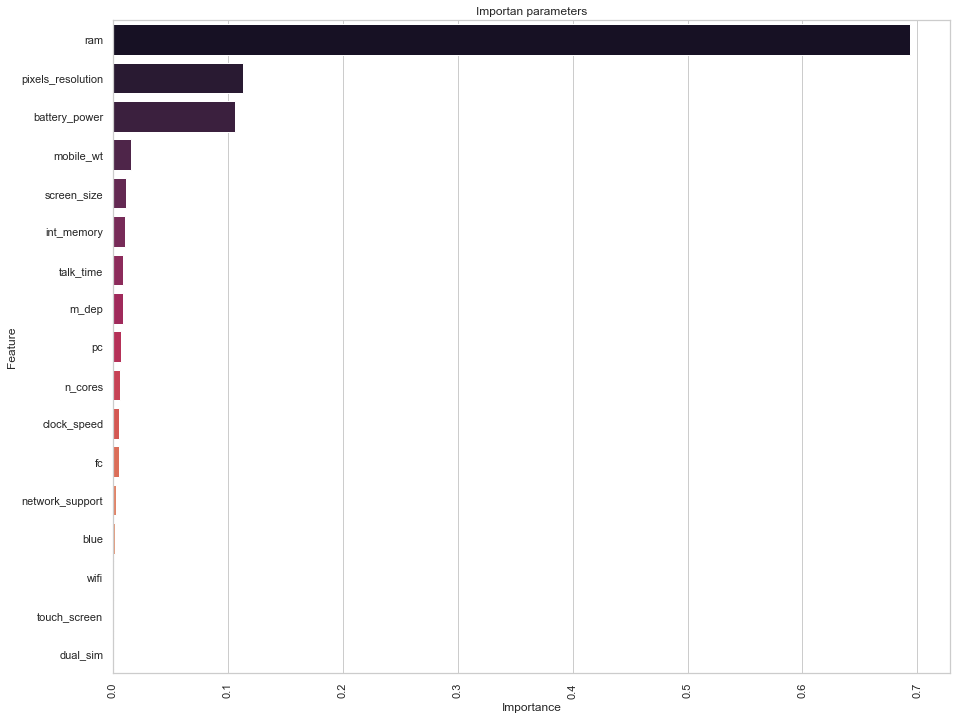

In [475]:
#plotting the important features obtainind from the optimal Random Forest model
fig = plt.figure(figsize=(15,12))
ax = fig.gca()
sns.barplot(x = 'Feature Importance', y = 'Feature', data=important_features, palette= 'rocket')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
ax.set_xlabel('Importance')
# ax.set_ylabel('Frequency')
ax.set_title('Importan parameters')

## Conclusion

  * In this mobile price range prediction project, we have used four different types of classification-based Machine Learning algorithms like **Random Forest Classifier**, **Gradient Boosting Classifier**, **XGBoost Classifier**, and **KNN Classifier**. We have done hyperparameter tuning parameters for them to find the best model out of them to get the best results, and we also found the important features for training the model from them.
  * Out of the four different models the hyperparameters tuned **Random Forest CLassifier** algorithm gives the best results with an accuracy of around **90%** for unseen data.
  * Since it is a good accuracy percentage, we can conclude that the model optimally generalized for getting future predictions.